# Εργαστήριο 6

#### Δειγματοληψία απόρριψης σε μεγάλες διαστάσεις.

#### Xριστίνα Τσακανίκα $8^ο$ Εξάμηνο ΗΜΜΥ ΑΜ: 03117012

In [51]:
from numpy import random

def vol(N,d):
    nhits = 0
    for i in range(N):
        x = random.uniform(-1,1,d)
        if sum(x ** 2) < 1: 
            nhits += 1
    print ("The Monte Carlo estimate of ω("+ str(d)+") is  :",2 ** d * nhits / N)
    return 2 ** d * nhits / N

d = 3
N = 10_000       

In [52]:
from math import gamma, pi 

def Vol1(d):
    x = d/2
    print("The actual value of ω("+ str(d)+") is: ", pi ** x / gamma(x + 1))
    return pi ** x / gamma(x + 1)

#### Παραδοτέο 1

#### α)

In [50]:
allN = True

N = 10**6
d = 2

actuals = []
ds = []

while(allN):
    monte = round(vol(N,d),4)
    actual = round(Vol1(d),4)
    actuals.append(actual)
    ds.append(d)
    print("The relative error is: ", round(abs(1-monte/actual)*100, 4))
    print()
    if monte ==0:
        allN=False
    else:
        d +=1    

The Monte Carlo estimate of ω(2) is  : 3.142092
The actual value of ω(2) is:  3.141592653589793
The relative error is:  0.0159

The Monte Carlo estimate of ω(3) is  : 4.186096
The actual value of ω(3) is:  4.1887902047863905
The relative error is:  0.0645

The Monte Carlo estimate of ω(4) is  : 4.929792
The actual value of ω(4) is:  4.934802200544679
The relative error is:  0.1013

The Monte Carlo estimate of ω(5) is  : 5.281568
The actual value of ω(5) is:  5.263789013914325
The relative error is:  0.3382

The Monte Carlo estimate of ω(6) is  : 5.18624
The actual value of ω(6) is:  5.167712780049969
The relative error is:  0.358

The Monte Carlo estimate of ω(7) is  : 4.708096
The actual value of ω(7) is:  4.7247659703314016
The relative error is:  0.3535

The Monte Carlo estimate of ω(8) is  : 4.056832
The actual value of ω(8) is:  4.058712126416768
The relative error is:  0.0468

The Monte Carlo estimate of ω(9) is  : 3.252224
The actual value of ω(9) is:  3.2985089027387064
The rel

#### β)

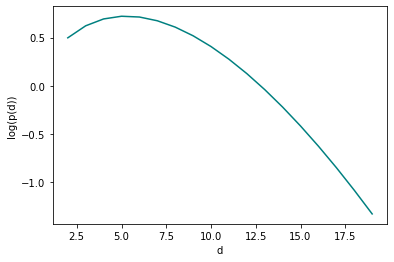

In [53]:
from math import log
import matplotlib.pyplot as plt

x_axis = ds
y_axis = [log(y,10) for y in actuals]

plt.plot(x_axis, y_axis,color="teal")
  
# naming the x axis
plt.xlabel('d')
# naming the y axis
plt.ylabel('log(p(d))')
# function to show the plot
plt.show()

Παρατηρούμε πως το το σχετικό σφάλμα της εκτίμησης που υπολογίστηκε στο (α) ερώτημα είναι μεγάλο όσο αυξάνει η διάσταση, καθώς για μεγάλα d ελάχιστα από τα $10^6$ δείγματα "πέφτουν" μέσα στην μπάλα. Αυτό αιτιολογείται, αφού ο όγκος την μπάλας ελαχιστοπιείται για πολύ μεγάλα d σε αντίθεση με τον όγκο του κύβου. Συνεπώς, χρειαζόμαστε περισσότερα δείγματα για μια ακριβέστερη προσέγγιση.

#### γ) 
Yπολογίζουμε τον λόγο:
$\frac{όγκος μπάλας}{όγκος κύβου} = \frac{\frac{\pi^{10} }{gamma(11)}}{2^{20}} = 2.46*10^{-8} $. Άρα, για τα 1000 δείγματα εντός της μπάλας χρειαζόμαστε $\frac{1000\cdot όγκος κύβου}{όγκος μπάλας} \approx  40631627582 $ δείγματα στον κύβο. Στον υπολογιστή μου ενδεχομένως να χρειαστούν 2 μέρες να τρέξει τα αποτελέσματα.

#### Παραδοτέο 2

#### α)

In [54]:
import random as r

def MCMC(delta):
 
    N = 100 # number of steps to approach equilibrium
    samples = 1000 
    point_x = []
    point_y = []

    for _ in range(samples):
        x = [0,0]  ## start at the centre of th disc. This variable will keep the position of the chain
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it

        for _ in range(N):
            k = r.choice([0,1])  ## choose a jump direction at random
            z = r.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2+ x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        point_x.append(x[0])
        point_y.append(x[1])
    
    return point_x, point_y

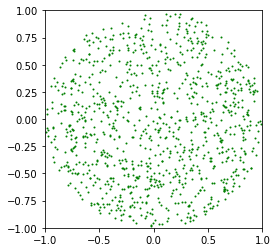

In [55]:
point_x, point_y = MCMC(1)

fig, ax = plt.subplots()

plt.scatter(point_x, point_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

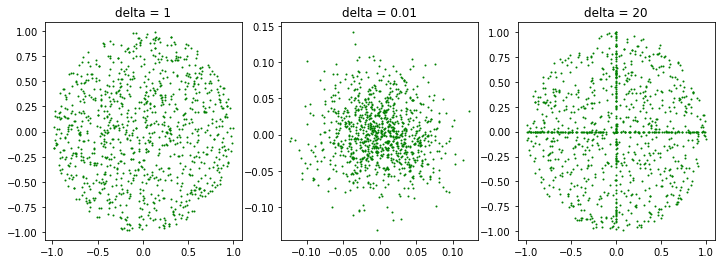

In [56]:
f, axarr = plt.subplots(1,3, figsize=(12,4))

x1,y1 =  MCMC(1)
x2,y2 =  MCMC(0.01)
x3,y3 =  MCMC(20)

axarr[0].scatter( x1,y1, color = 'green', s = 1)
axarr[0].title.set_text('delta = 1')
axarr[1].scatter( x2,y2, color = 'green', s = 1)
axarr[1].title.set_text('delta = 0.01')
axarr[2].scatter( x3,y3, color = 'green', s = 1)
axarr[2].title.set_text('delta = 20')


$ \bullet $ Στο πρώτο διάγραμμα, όπου delta = 1, τα σημεία παρουσιάζουν ομοιόμορφη κατανομή στον δίσκο.

$ \bullet $ Στο δεύτερο διάγραμμα, όπου delta = 0.01, τα σημεία παρουσιάζουν έντονη συγκέντρωση στο κέντρο του δίσκου. Λόγω του εκατό φορές μικρότερου δ, τα βήματα δεν είναι μεγάλα και χρειαζόμαστε περισσότερα από 100 βήματα για να ξεφύγουμε από το κέντρο.

$ \bullet $ Στο τρίτο διάγραμμα, όπου delta = 20, τα σημεία παρουσιάζουν συγκέντρωση στον οριζόντιο και και τον κάθετο άξονα. Στην περίπτωση αυτή το βήμα ανοίγει και λόγω αυτού πολλά σημεία βγαινουν εκτός του δίσκου. Επειδή στην αρχή με ένα βήμα πέφτουμε πάνω στους άξονες, ενώ με παραπάνω κινδυνεύουμε να βγούμε από μοναδιαίο δίσκο, παρατηρούμε υπερσυσσώρευση στους άξονες.


#### β)

In [59]:
import numpy as np

vol = 2
delta = 1.0
N = 1000 
samples = 1000 

#αυξήσαμε τις παραμέτρους Ν, samples για την επίτευξη καλύτερων αποτελεσμάτων!
for d in range(2,101):
    
    nhits = 0
    
    for _ in range(samples):
        
        R_sq = 0.0  ## this variable keeps the squared distance from 0. It saves some computations to keep it
        x = np.zeros(d-1)
        direction = [x for x in range(d-1)]
        
        for _ in range(N):
            k = random.choice(direction)  ## choose a jump direction at random
            z = random.uniform(-delta,delta) ## choose a jump size uniformly in (-delta,delta)
            
            x_prop_k = x[k] + z   ## propose a jump by z in the direction k
            R_sqprop = R_sq - x[k]**2 + x_prop_k**2 ## compute the squared distance from 0 after the proposed jump 
            
            if R_sqprop < 1.0: 
                R_sq = R_sqprop
                x[k]= x_prop_k   ## if the proposed jump leads to a point in the disc, then jump
        
        xN = random.uniform(-1, 1)
        
        if R_sq + xN**2 < 1: 
            nhits += 1
        
    new_vol = 2*nhits*vol/samples
    vol = new_vol
    
    #2*hits/tries = Volume(n+1)/Volume(n)    
    print("O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = "+str(d)+"  διαστάσεις ισούται με:",new_vol )
    actual = Vol1(d)
    print("Η πραγματική τιμή του όγκου:", actual)
    print("To σχετικό σφάλμα της εκτίμησης:", 100*abs(1-new_vol/actual),'%', " \n")

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 2  διαστάσεις ισούται με: 3.128
Η πραγματική τιμή του όγκου: 3.141592653589793
To σχετικό σφάλμα της εκτίμησης: 0.4326676017102682 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 3  διαστάσεις ισούται με: 3.960048
Η πραγματική τιμή του όγκου: 4.1887902047863905
To σχετικό σφάλμα της εκτίμησης: 5.460817887823898 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 4  διαστάσεις ισούται με: 4.878779136
Η πραγματική τιμή του όγκου: 4.934802200544679
To σχετικό σφάλμα της εκτίμησης: 1.1352646421875834 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 5  διαστάσεις ισούται με: 4.995869835264
Η πραγματική τιμή του όγκου: 5.263789013914325
To σχετικό σφάλμα της εκτίμησης: 5.089854056500098 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 6  διαστάσεις ισούται με: 5.04582853361664
Η πραγματική τιμή του όγκου: 5.167712780049969
To σχετικό σφάλμα της εκτίμησης: 2.358572382425461 %  

O εκτιμώ

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 41  διαστάσεις ισούται με: 8.042035895705286e-10
Η πραγματική τιμή του όγκου: 1.4025649060732007e-09
To σχετικό σφάλμα της εκτίμησης: 42.66193414021178 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 42  διαστάσεις ισούται με: 2.943385137828135e-10
Η πραγματική τιμή του όγκου: 5.392664662608125e-10
To σχετικό σφάλμα της εκτίμησης: 45.4187248423382 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 43  διαστάσεις ισούται με: 1.2067879065095353e-10
Η πραγματική τιμή του όγκου: 2.0494360953964767e-10
To σχετικό σφάλμα της εκτίμησης: 41.11609973005407 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 44  διαστάσεις ισούται με: 4.996101932949476e-11
Η πραγματική τιμή του όγκου: 7.700707130601346e-11
To σχετικό σφάλμα της εκτίμησης: 35.12151743707034 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 45  διαστάσεις ισούται με: 1.658705841739226e-11
Η πραγματική τιμή του όγκου: 2.861552613

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 80  διαστάσεις ισούται με: 6.274495155280388e-29
Η πραγματική τιμή του όγκου: 9.426486276736277e-29
To σχετικό σφάλμα της εκτίμησης: 33.43760367248102 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 81  διαστάσεις ισούται με: 1.9576424884474812e-29
Η πραγματική τιμή του όγκου: 2.617320358731286e-29
To σχετικό σφάλμα της εκτίμησης: 25.20432273730433 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 82  διαστάσεις ισούται με: 5.403093268115048e-30
Η πραγματική τιμή του όγκου: 7.222970740526754e-30
To σχετικό σφάλμα της εκτίμησης: 25.195692157531656 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 83  διαστάσεις ισούται με: 1.3831918766374523e-30
Η πραγματική τιμή του όγκου: 1.9813384123087263e-30
To σχετικό σφάλμα της εκτίμησης: 30.18901425195165 %  

O εκτιμώμενος με MCMC όγκoς της μοναδιαίας μπάλας σε 𝑑 = 84  διαστάσεις ισούται με: 4.177239467445106e-31
Η πραγματική τιμή του όγκου: 5.4027694